In [2]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from copy import deepcopy as dp
from skimage import transform as tf
%matplotlib inline

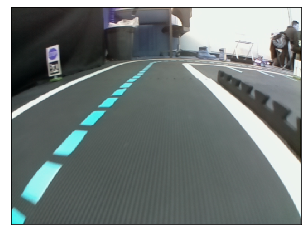

(480, 640, 3)


In [23]:
def imShow(img):
    plt.imshow(img, cmap="gray")
    plt.xticks([]), plt.yticks([])
    plt.show()
    
road = cv2.imread("straight.png")
road = cv2.resize(road, (640, 480))
road = cv2.cvtColor(road, cv2.COLOR_BGR2RGB)
imShow(road)
print(road.shape)

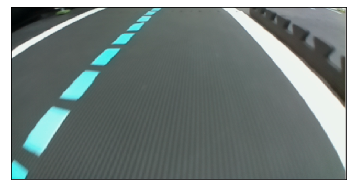

(330, 640, 3)


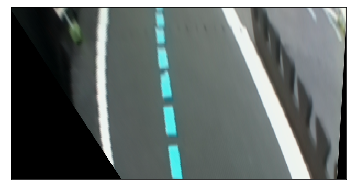

(330, 640, 3)


In [24]:
img = dp(road[150:,:,:])
#road = cv2.cvtColor(road, cv2.COLOR_BGR2RGB)
init_img = dp(img)
imShow(img)
print(img.shape)
#M = np.array( [[-1.27373e-05, -0.0002421778, -0.1970125], [0.001029818, -1.578045e-05, -0.337324], [-0.0001088811, -0.007584862, 1]])
M = np.array([[1.01123, 3.01646, -4.5], [0, 4.65629, 0], [0, 0.00513, 1]  ])
M_inv = np.linalg.inv(M)
#M_inv = 
size = (img.shape[1], img.shape[0])
out = cv2.warpPerspective(img, M, size)
imShow(out)
img = dp(out)
print(out.shape)

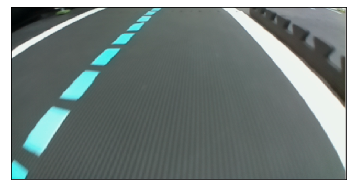

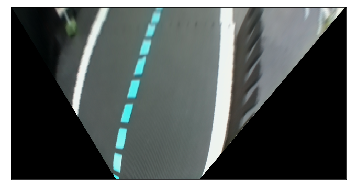

In [25]:
img = dp(road[150:,:,:])

IMAGE_H, IMAGE_W,_ = img.shape

src = np.float32([[0, IMAGE_H], [640, IMAGE_H], [0, 0], [IMAGE_W, 0]])
dst = np.float32([[200, IMAGE_H], [360, IMAGE_H], [0, 0], [IMAGE_W, 0]])

M = cv2.getPerspectiveTransform(src, dst)
Minv = cv2.getPerspectiveTransform(dst, src)

warped_img = cv2.warpPerspective(img, M, (IMAGE_W, IMAGE_H))

imShow(img)
imShow(warped_img)

In [19]:
#-----Reading the image-----------------------------------------------------

#-----Converting image to LAB Color model-----------------------------------
lab= cv2.cvtColor(img, cv2.COLOR_BGR2LAB)
#-----Splitting the LAB image to different channels-------------------------
l, a, b = cv2.split(lab)
#-----Applying CLAHE to L-channel-------------------------------------------
clahe = cv2.createCLAHE(clipLimit=4.0, tileGridSize=(8,8))
cl = clahe.apply(l)
ca = clahe.apply(a)
cb = clahe.apply(b)

#-----Merge the CLAHE enhanced L-channel with the a and b channel-----------
limg = cv2.merge((l,a,cb))

#-----Converting image from LAB Color model to RGB model--------------------
img = cv2.cvtColor(limg, cv2.COLOR_LAB2BGR)

#_____END_____#

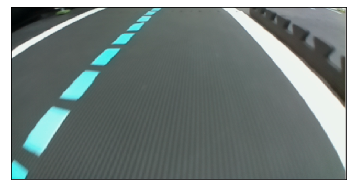

In [26]:
imShow(img)

In [27]:
blur = cv2.GaussianBlur(img,(5,5),0)
img_lab = cv2.cvtColor(img, cv2.COLOR_RGB2Lab)

L, a, b = cv2.split(img_lab)

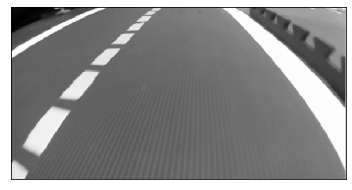

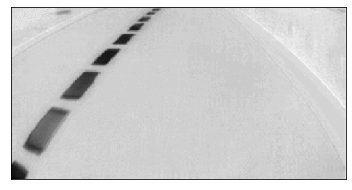

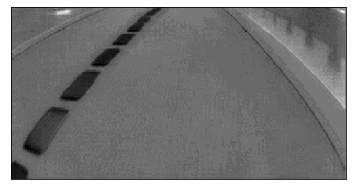

In [28]:
imShow(L)
imShow(a)
imShow(b)

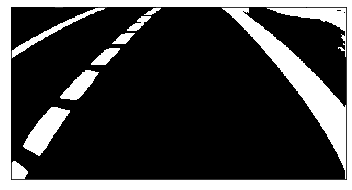

(330, 640)


In [29]:
_, thresh_b = cv2.threshold(b, 0, 255, cv2.THRESH_OTSU + cv2.THRESH_BINARY)
_, thresh_L = cv2.threshold(L, 150, 255, cv2.THRESH_BINARY)
kernel = np.ones((3,20),np.uint8)
#erosion = cv2.erode(thresh_b,kernel,iterations = 2)
closing = cv2.morphologyEx(thresh_b, cv2.MORPH_OPEN, kernel)
closing = cv2.morphologyEx(closing, cv2.MORPH_OPEN, kernel)

#imShow(closing)
#imShow(thresh_b)

imShow(thresh_L)
#imShow(cv2.bitwise_and( thresh_L, thresh_b ))
print(thresh_L.shape)

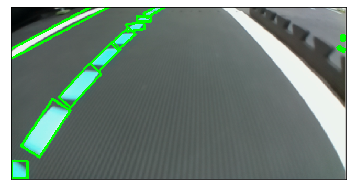

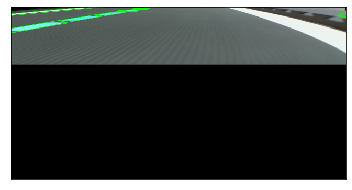

(330, 640, 3)


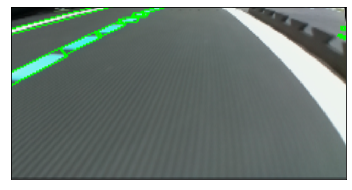

In [30]:
contours, hierarchy = cv2.findContours(thresh_L, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

for cnt in contours:
        rect = cv2.minAreaRect(cnt)
        box = cv2.boxPoints(rect)
        box = np.int0(box)
        area = cv2.contourArea(box)
        #i-=1
        if area > 50 and area < 8500:
        #if i == 0:
            cv2.drawContours(img, [box], -1, (0,255,0), 3)
            #print(area)

imShow(img)
rez = cv2.warpPerspective(dp(img), M_inv, size)
imShow(rez)
#print(rez.shape)


gray = cv2.cvtColor(rez,cv2.COLOR_BGR2GRAY)
_,thresh = cv2.threshold(gray,1,255,cv2.THRESH_BINARY)
contours,hierarchy = cv2.findContours(thresh,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
cnt = contours[0]
x,y,w,h = cv2.boundingRect(cnt)
crop = rez[y:y+h,x:x+w]

crop = cv2.resize(crop, (640, 330))
print(crop.shape)

imShow(crop)
#imShow(road[150:,:,:])

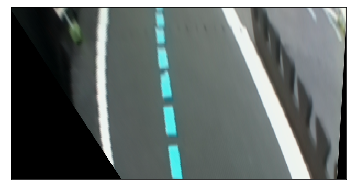

In [31]:
font = cv2.FONT_HERSHEY_SIMPLEX
for cnt in contours:
    #print(1)
    perimeter = cv2.arcLength(cnt,True)
    approx = cv2.approxPolyDP(cnt, 0.1 * perimeter, True)
    if len(approx) == 4:
        (x, y, w, h) = cv2.boundingRect(approx)
        #print(2)
        ar = w / float(h)
        area = cv2.contourArea(cnt)
        if (ar >= 0.35 or ar <= 0.65) and (area > 50 and area < 4000):
            #print(len(approx))
            cv2.drawContours(out,[approx],0,(0,0,255),-1)
            #cv2.putText(out, str(ar), (x,y), font, 1, (0, 255, 0), 2, cv2.LINE_AA)
            
imShow(out)

In [32]:
M_inv = np.array([[0.9889, -0.6455, 4.5], [0, 0.2148, 0], [0, -0.0011, 1]  ])

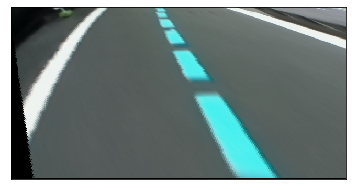

In [33]:
size = (out.shape[1], out.shape[0])
rez = cv2.warpPerspective(out, M, size, flags=cv2.WARP_INVERSE_MAP, borderMode=cv2.BORDER_TRANSPARENT)
imShow(rez)

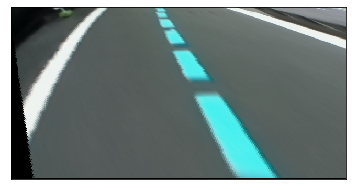

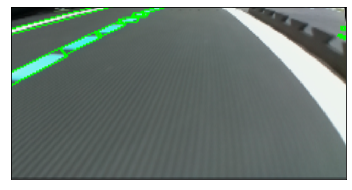

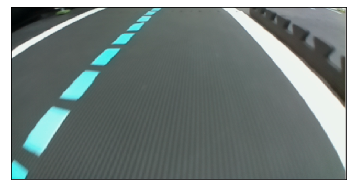

In [34]:
imShow(rez)
imShow(crop)
imShow(init_img)

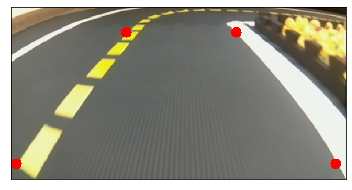

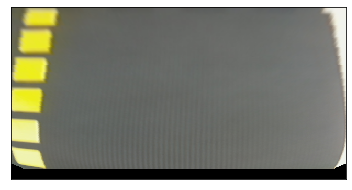

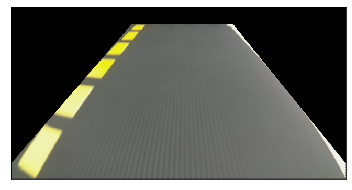

In [35]:
road = cv2.imread("curve_road.png")
road = cv2.resize(road, (640, 480))
road = road[150:,:,:]
proj = dp(road)
cv2.circle(proj, (10, 300), 10, (255, 0, 0), -1)
cv2.circle(proj, (620, 300), 10, (255, 0, 0), -1)
cv2.circle(proj, (220, 50), 10, (255, 0, 0), -1)
cv2.circle(proj, (430, 50), 10, (255, 0, 0), -1)
imShow(proj)
srcPoints = np.array( [[10, 300], [620, 300], [220, 50], [430, 50]] )
dstPoints = np.array( [[10, 300], [620, 300], [10, 50], [620, 50]] )

homogenius = cv2.getPerspectiveTransform(srcPoints.astype(np.float32), dstPoints.astype(np.float32))
inv_homogenius = cv2.getPerspectiveTransform( dstPoints.astype(np.float32), srcPoints.astype(np.float32) )

warped = cv2.warpPerspective(road, homogenius, (proj.shape[1], proj.shape[0]))
imShow(warped)

unwarped = cv2.warpPerspective(warped, inv_homogenius, (proj.shape[1], proj.shape[0]))
imShow(unwarped)

In [36]:
tform = tf.ProjectiveTransform(matrix=M)
tform_inv = tf.ProjectiveTransform(matrix=M_inv)

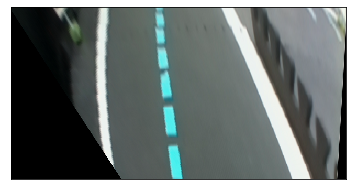

In [37]:
warped = tf.warp(init_img, tform_inv, order=3)
imShow(warped)

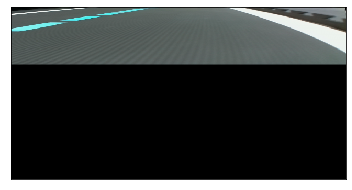

In [38]:
unwarped = tf.warp(init_img, tform_inv.inverse, order=3)
imShow(unwarped)

In [19]:
H = np.array([-1.27373e-05, -0.0002421778, -0.1970125, 0.001029818, -1.578045e-05, -0.337324, -0.0001088811, -0.007584862, 1])
H.resize( 4,4 )
print(H)
print("----------------------------------------------------")
K = np.array([305.5718893575089, 0, 303.0797142544728, 0, 308.8338858195428, 231.8845403702499, 0, 0, 1])
K.resize(3, 3)
print(K)
print("----------------------------------------------------")
D = np.array([-0.2944667743901807, 0.0701431287084318, 0.0005859930422629722, -0.0006697840226199427, 0])
D.resize(1, 5)
print(D)
print("----------------------------------------------------")
R = np.array([1, 0, 0, 0, 1, 0, 0, 0, 1])
R.resize(3, 3)
print(R)
print("----------------------------------------------------")
P = np.array([220.2460277141687, 0, 301.8668918355899, 0, 0, 238.6758484095299, 227.0880056118307, 0, 0, 0, 1, 0])
P.resize(3, 4)
print(P)

[[-1.273730e-05 -2.421778e-04 -1.970125e-01  1.029818e-03]
 [-1.578045e-05 -3.373240e-01 -1.088811e-04 -7.584862e-03]
 [ 1.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00]
 [ 0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00]]
----------------------------------------------------
[[305.57188936   0.         303.07971425]
 [  0.         308.83388582 231.88454037]
 [  0.           0.           1.        ]]
----------------------------------------------------
[[-0.29446677  0.07014313  0.00058599 -0.00066978  0.        ]]
----------------------------------------------------
[[1 0 0]
 [0 1 0]
 [0 0 1]]
----------------------------------------------------
[[220.24602771   0.         301.86689184   0.        ]
 [  0.         238.67584841 227.08800561   0.        ]
 [  0.           0.           1.           0.        ]]


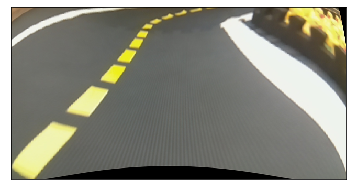

In [20]:
cv_rect = np.zeros((proj.shape[1], proj.shape[0]))

mapx = np.ndarray(shape=(proj.shape[1], proj.shape[0], 1), dtype='float32')
mapy = np.ndarray(shape=(proj.shape[1], proj.shape[0], 1), dtype='float32')

mapx, mapy = cv2.initUndistortRectifyMap(K, D, R, P, (proj.shape[1], proj.shape[0]), cv2.CV_32FC1, mapx, mapy)

resulted = cv2.remap(road, mapx, mapy, cv2.INTER_CUBIC, cv_rect)
imShow(resulted)

In [21]:
H = np.array([-4.89775e-05, -0.0002150858, -0.1818273, 0.00099274, 1.202336e-06, -0.3280241, -0.0004281805, -0.007185673, 1]).astype(np.float32)
H.resize(3, 3)
print(H)
H_inv = np.linalg.inv(H.T)

[[-4.897750e-05 -2.150858e-04 -1.818273e-01]
 [ 9.927400e-04  1.202336e-06 -3.280241e-01]
 [-4.281805e-04 -7.185673e-03  1.000000e+00]]


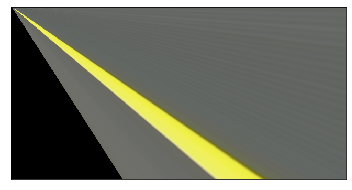

In [22]:
warped = cv2.warpPerspective(road, H, (proj.shape[1], proj.shape[0]))
imShow(warped)

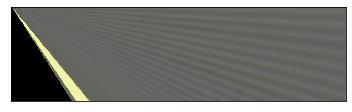

In [23]:
img = dp(road[150:,:,:])

H = np.array([[-4.89775e-05, -0.0002150858, -0.1818273], [0.00099274, 1.202336e-06, -0.3280241], [-0.0004281805, -0.007185673, 1]])
H = H * img.shape[0] * img.shape[1]
H_inv = np.linalg.inv(H)
warped = cv2.warpPerspective(img, H, (img.shape[1], img.shape[0]))
imShow(warped)


In [12]:
M = np.array([1.9353899780957532e-05, -0.00017594652267255518, -0.23530068966442091,
  0.0009113161348561763, 4.211150887794892e-06, -0.26092989999696975, 0.00014208256631522472,
  -0.00600411520134865, 0.9999999999999999]).reshape((3, 3))
M_inv = np.linalg.inv(M)

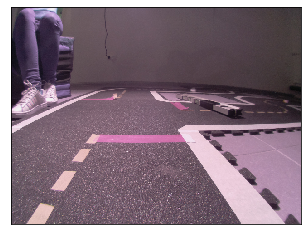

(480, 640, 3)
(480, 640, 3)


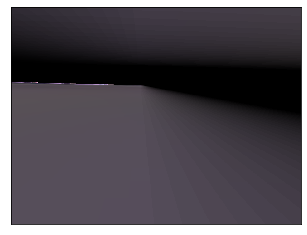

In [27]:
test_img = cv2.imread("test.jpg")
test_img = cv2.resize(test_img, (640, 480))
test_img = cv2.cvtColor(test_img, cv2.COLOR_BGR2RGB)
imShow(test_img)

warped = cv2.warpPerspective(test_img, M_inv, (test_img.shape[1], test_img.shape[0]))
print(warped.shape)
print(test_img.shape)

imShow(warped)

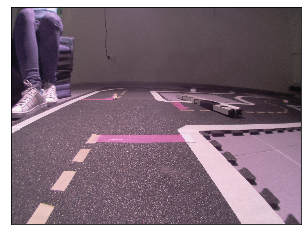

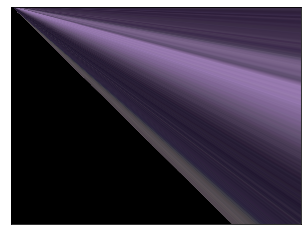

In [18]:
test_img = cv2.imread("test.jpg")
test_img = cv2.cvtColor(test_img, cv2.COLOR_BGR2RGB)
imShow(test_img)

tform = tf.ProjectiveTransform(matrix=M)
tform_inv = tf.ProjectiveTransform(matrix=M_inv)

warped = tf.warp(test_img, tform_inv, order=3)
imShow(warped)